## Multiple linear regression using Hilbert transform

Written by Abirlal Metya, Panini Dasgupta, Manmeet Singh (25/12/2019)

import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, chirp
import hilbert_data1_panini_20CRV333
import datetime


import statsmodels.api as sm

Read Data

In [2]:
x_train,y_train,_ = hilbert_data1_panini_20CRV333.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,y_test,_ = hilbert_data1_panini_20CRV333.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))


In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((10839, 36), (10839, 1), (2437, 36), (2437, 1))

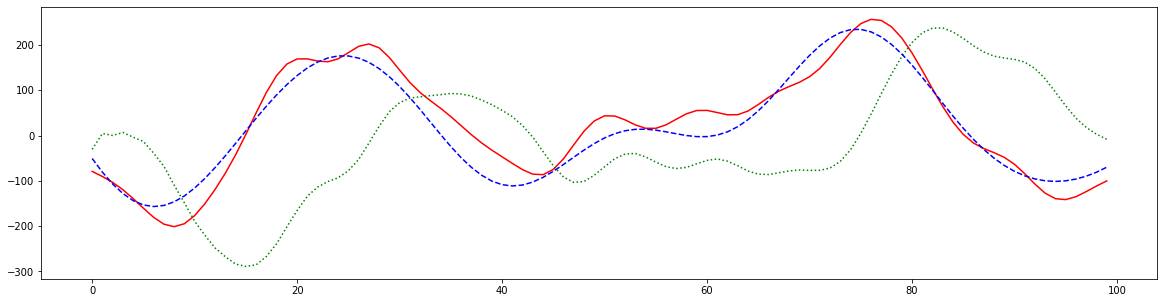

In [10]:
import matplotlib.pyplot as plt#plot the first image in the dataset
from scipy.signal import hilbert
plt.figure(figsize=[20,5])
#plt.imshow(xtrain[1,:,:,0])
plt.plot(np.arange(100),x_train.iloc[0:100,0],'-r')
plt.plot(np.arange(100),np.imag(hilbert(x_train.iloc[:,0])[0:100]),':g')
plt.plot(np.arange(100),x_train.iloc[0:100,12],'--b')

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


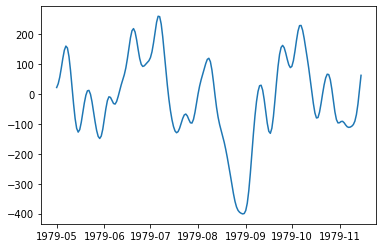

In [11]:
plt.plot(x_train.iloc[1:200,2])

In [12]:
from sklearn import linear_model

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [14]:
predictions = lm.predict(x_test.values)

In [15]:
predictions.shape

(2437, 1)

In [16]:
(lm.score(x_train.values,y_train.values))**0.5

0.854688953335458

In [17]:
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.        , 0.82795772],
       [0.82795772, 1.        ]])

Plot different columns

In [18]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rmm1   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              806.5
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:10:58   Log-Likelihood:                         -8248.4
No. Observations:               10839   AIC:                                  1.657e+04
Df Residuals:                   10803   BIC:                                  1.683e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0014      0.000      5.706      0.000       0.001       0.002
1              0.0006      0.000      3.129      0.002       0.000       0.001
2           6.906e-05      0.000      0.584      0.559      -0.000       0.000
3             -0.0005   6.15e-05     -7.651      0.000      -0.001      -0.000
4              0.0002      0.000      1.531      0.126    -5.6e-05       0.000
5              0.0001      0.000      1.088      0.277      -0.000       0.000
6             -0.0012   7.86e-05    -14.898      0.000      -0.001      -0.001
7             -0.0003   6.27e-05     -5.408      0.000      -0.000      -0.000
8          -7.207e-05      0.000     -0.372      0.710      -0.000       0.000
9             -0.0007      0.000     -6.148      0.000      -0.001      -0.000
10             0.0029      0.000     18.190      0.000       0.003       0.003
11            -0.0033      0.000    -20.195      0.000      -0.004      -0.003
0              0.0014      0.000      4.162      0.000       0.001       0.002
1             -0.0010      0.000     -3.514      0.000      -0.002      -0.000
2              0.0004      0.000      2.080      0.038    2.03e-05       0.001
3              0.0002   8.28e-05      2.793      0.005     6.9e-05       0.000
4              0.0003      0.000      1.808      0.071   -2.84e-05       0.001
5              0.0008      0.000      4.383      0.000       0.000       0.001
6             -0.0003      0.000     -3.209      0.001      -0.001      -0.000
7           7.667e-05   8.62e-05      0.889      0.374   -9.24e-05       0.000
8              0.0015      0.000      4.951      0.000       0.001       0.002
9             -0.0010      0.000     -6.435      0.000      -0.001      -0.001
10            -0.0016      0.000     -6.647      0.000      -0.002      -0.001
11            -0.0010      0.000     -4.360      0.000      -0.002      -0.001
0             -0.0018      0.000     -6.916      0.000      -0.002      -0.001
1             -0.0019      0.000     -9.180      0.000      -0.002      -0.001
2             -0.0003      0.000     -2.360      0.018      -0.001   -5.18e-05
3              0.0010   5.81e-05     16.380      0.000       0.001       0.001
4             -0.0011      0.000     -7.930      0.000      -0.001      -0.001
5             -0.0011      0.000     -7.839      0.000      -0.001      -0.001
6              0.0004    7.8e-05      5.373      0.000       0.000       0.001
7              0.0005   6.09e-05      8.890      0.000       0.000       0.001
8              0.0001      0.000      0.464      0.643      -0.000       0.001
9              0.0036      0.000     29.457      0.000       0.003       0.004
10             0.0019      0.000      9.084      0.000       

In [13]:
x_test3 = hilbert_data1_panini_20CRV333.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions.std()
rmm1_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm1_predict.to_csv('rmm1_MLR_36_rp_filt.txt')

# MLP

In [14]:
from sklearn.preprocessing import MinMaxScaler

sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_train[:])

#test_x3 =  sc5.transform(x_test3[:])
train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])


sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)

train_x.max(),test_x.max(),train_y.max(),test_y.max()

from keras.models import Sequential
from keras.layers import Dense,Dropout

# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=36, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

history = model.fit(train_x, train_y, validation_data=(test_x,test_y),epochs=30, batch_size=10)

Using TensorFlow backend.


Train on 10839 samples, validate on 2437 samples
Epoch 1/30
10839/10839 [==============================] - 2s 177us/step - loss: 0.1018 - val_loss: 0.0675
Epoch 2/30
10839/10839 [==============================] - 1s 136us/step - loss: 0.0754 - val_loss: 0.0651
Epoch 3/30
10839/10839 [==============================] - 1s 137us/step - loss: 0.0697 - val_loss: 0.0617
Epoch 4/30
10839/10839 [==============================] - 2s 140us/step - loss: 0.0673 - val_loss: 0.0592
Epoch 5/30
10839/10839 [==============================] - 2s 140us/step - loss: 0.0665 - val_loss: 0.0580
Epoch 6/30
10839/10839 [==============================] - 1s 136us/step - loss: 0.0657 - val_loss: 0.0597
Epoch 7/30
10839/10839 [==============================] - 1s 137us/step - loss: 0.0654 - val_loss: 0.0650
Epoch 8/30
10839/10839 [==============================] - 1s 137us/step - loss: 0.0643 - val_loss: 0.0623
Epoch 9/30
10839/10839 [==============================] - 2s 144us/step - loss: 0.0646 - val_loss: 0.06

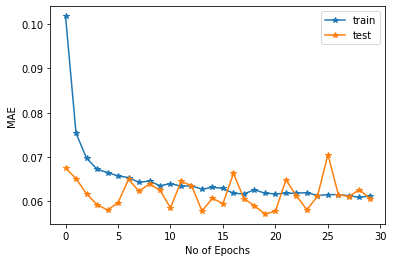

In [15]:
plt.plot(history.history['loss'],'-*',label ='train')
plt.plot(history.history['val_loss'],'-*',label ='test')
plt.ylabel('MAE')
plt.xlabel('No of Epochs')
plt.legend()

training shape = 
(10839, 1)


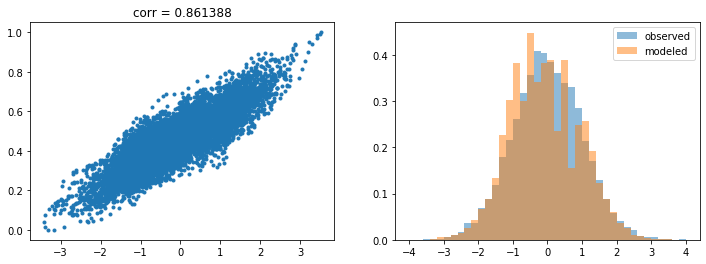

In [16]:
predict1   = model.predict(train_x)
yy_train   = sc3.inverse_transform(predict1)
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm1,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [17]:
test_x.shape

(2437, 36)

test shape = 
(2437, 1)


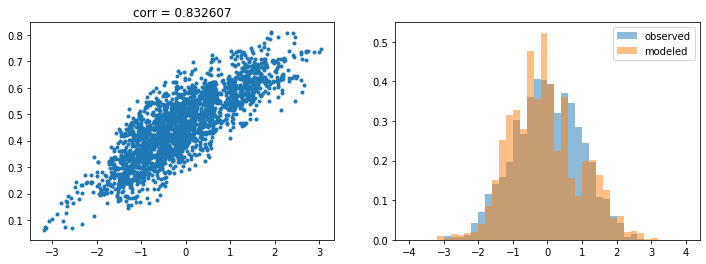

In [18]:
predict2  = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict2)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm1,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

## RMM2

In [19]:
x_train,_,y_train = hilbert_data1_panini_20CRV333.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,_,y_test = hilbert_data1_panini_20CRV333.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))


In [20]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [21]:
predictions = lm.predict(x_test.values)

In [22]:
(lm.score(x_train.values,y_train.values))**0.5

0.8532745442442299

In [23]:
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.       , 0.8086183],
       [0.8086183, 1.       ]])

In [24]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [25]:
x_test3 = hilbert_data1_panini_20CRV333.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions.std()
rmm2_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm2_predict.to_csv('rmm2_MLR_36_rp_filt.txt')

In [26]:
from sklearn.preprocessing import MinMaxScaler

sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_train[:])

#test_x3 =  sc5.transform(x_test3[:])
train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])


sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)

train_x.max(),test_x.max(),train_y.max(),test_y.max()

from keras.models import Sequential
from keras.layers import Dense,Dropout

# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=36, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

history = model.fit(train_x, train_y, validation_data=(test_x,test_y),epochs=30, batch_size=10)

Train on 10839 samples, validate on 2437 samples
Epoch 1/30
10839/10839 [==============================] - 2s 171us/step - loss: 0.1155 - val_loss: 0.0787
Epoch 2/30
10839/10839 [==============================] - 2s 147us/step - loss: 0.0848 - val_loss: 0.0757
Epoch 3/30
10839/10839 [==============================] - 2s 139us/step - loss: 0.0775 - val_loss: 0.0750
Epoch 4/30
10839/10839 [==============================] - 2s 153us/step - loss: 0.0769 - val_loss: 0.0739
Epoch 5/30
10839/10839 [==============================] - 2s 159us/step - loss: 0.0747 - val_loss: 0.0786
Epoch 6/30
10839/10839 [==============================] - 2s 144us/step - loss: 0.0743 - val_loss: 0.0795
Epoch 7/30
10839/10839 [==============================] - 2s 141us/step - loss: 0.0730 - val_loss: 0.0709
Epoch 8/30
10839/10839 [==============================] - 2s 145us/step - loss: 0.0721 - val_loss: 0.0746
Epoch 9/30
10839/10839 [==============================] - 2s 142us/step - loss: 0.0718 - val_loss: 0.07

training shape = 
(10839, 1)


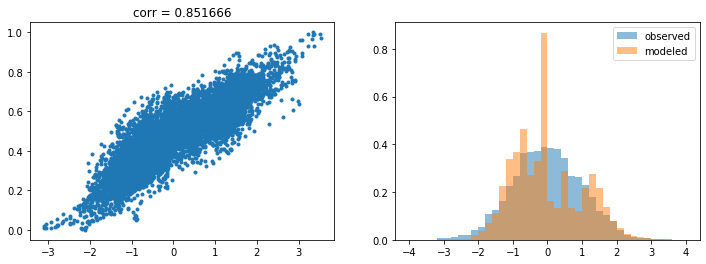

In [27]:
predict1   = model.predict(train_x)
yy_train   = sc3.inverse_transform(predict1)
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(2437, 1)


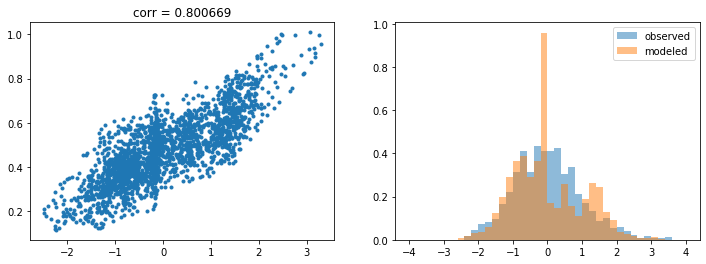

In [28]:
predict2  = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict2)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()